In [1]:
from __future__ import print_function, division
import os, bz2, json, time, tqdm
from datetime import timedelta

import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import my_util

In [2]:
categories = ["activism","autos","comedy","education","entertainment", \
              "film","gaming","howto","movies","music",\
              "news","people","pets","science","shows",\
              "sports","trailers","travel"]

categories_eligible = ["autos","comedy","education","entertainment", \
                       "film","gaming","howto","music",\
                       "news","people","science","sports",\
                       "travel"]

eval_days = [90, 135, 180, 225, 270]

In [3]:
# dataset_base = "G:/MLCV dataset/engagement'16/tweeted_videos" 
dataset_base = "/Users/zhuxinqi/Documents/online_attention/engagement'16/tweeted_videos"
category_feat_file = "./stats/smooth_times=2.csv"


category_feat = pd.read_csv(category_feat_file)

In [4]:
category_feat

,category,dig&135,dig&180,dig&225,dig&270,135&180,180&225,225&270
0,comedy,2.115,2.155,2.397,2.580,0.041,0.242,0.182
1,entertainment,2.625,2.841,3.245,3.502,0.217,0.404,0.257
2,film,2.028,2.253,2.477,2.683,0.226,0.223,0.206
3,gaming,3.127,3.207,3.484,3.732,0.080,0.277,0.248
4,news,2.831,3.122,3.202,3.318,0.291,0.080,0.116
5,music,1.271,1.727,2.107,2.526,0.456,0.380,0.419
6,education,1.860,2.121,2.323,2.500,0.261,0.203,0.177
7,howto,2.379,2.555,2.763,3.004,0.176,0.208,0.240
8,autos,2.379,2.574,2.711,2.888,0.195,0.137,0.177
9,people,2.200,2.379,2.577,2.882,0.179,0.198,0.305


In [5]:
aggregations = {
    "dig_dis_sum": [],
    "neigh_dis_sum": []
}

for i, row in category_feat.iterrows():
    aggregations["dig_dis_sum"].append(sum(row[1:5]))
    aggregations["neigh_dis_sum"].append(sum(row[5:]))
    
category_feat_agg = category_feat.assign(**aggregations)

In [6]:
category_feat_agg.sort_values(by="dig_dis_sum")

,category,dig&135,dig&180,dig&225,dig&270,135&180,180&225,225&270,dig_dis_sum,neigh_dis_sum
5,music,1.271,1.727,2.107,2.526,0.456,0.380,0.419,7.631,1.255
6,education,1.860,2.121,2.323,2.500,0.261,0.203,0.177,8.804,0.641
0,comedy,2.115,2.155,2.397,2.580,0.041,0.242,0.182,9.247,0.465
2,film,2.028,2.253,2.477,2.683,0.226,0.223,0.206,9.441,0.655
9,people,2.200,2.379,2.577,2.882,0.179,0.198,0.305,10.038,0.682
8,autos,2.379,2.574,2.711,2.888,0.195,0.137,0.177,10.552,0.509
7,howto,2.379,2.555,2.763,3.004,0.176,0.208,0.240,10.701,0.624
12,travel,2.601,2.732,2.742,2.868,0.131,0.009,0.126,10.943,0.266
1,entertainment,2.625,2.841,3.245,3.502,0.217,0.404,0.257,12.213,0.878
4,news,2.831,3.122,3.202,3.318,0.291,0.080,0.116,12.473,0.487


- 'music',
- 'education','comedy','film','people','autos','howto','travel',
- 'entertainment','news','science','sports','gaming'

In [7]:
category_feat_agg.sort_values(by="neigh_dis_sum")

,category,dig&135,dig&180,dig&225,dig&270,135&180,180&225,225&270,dig_dis_sum,neigh_dis_sum
12,travel,2.601,2.732,2.742,2.868,0.131,0.009,0.126,10.943,0.266
11,sports,2.981,3.141,3.354,3.355,0.160,0.213,0.001,12.831,0.374
0,comedy,2.115,2.155,2.397,2.580,0.041,0.242,0.182,9.247,0.465
4,news,2.831,3.122,3.202,3.318,0.291,0.080,0.116,12.473,0.487
8,autos,2.379,2.574,2.711,2.888,0.195,0.137,0.177,10.552,0.509
3,gaming,3.127,3.207,3.484,3.732,0.080,0.277,0.248,13.550,0.605
7,howto,2.379,2.555,2.763,3.004,0.176,0.208,0.240,10.701,0.624
6,education,1.860,2.121,2.323,2.500,0.261,0.203,0.177,8.804,0.641
2,film,2.028,2.253,2.477,2.683,0.226,0.223,0.206,9.441,0.655
9,people,2.200,2.379,2.577,2.882,0.179,0.198,0.305,10.038,0.682


- 'travel',
- 'sports','comedy','news','autos'
- 'gaming', 'howto', 'education','film','people','science'
- 'entertainment'
- 'music'

In [8]:
plt.rcParams.update({'axes.labelsize': 20, 
                     'xtick.labelsize': 14,
                     'ytick.labelsize': 14})

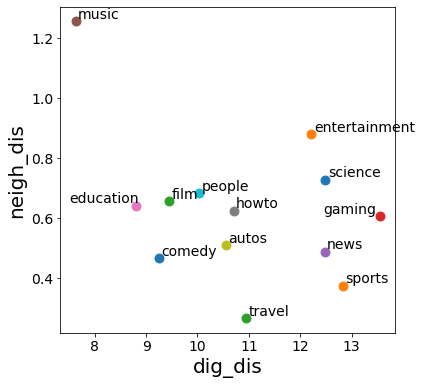

In [19]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
# ax.set_title(title, color="blue", fontsize=18)
for i, row in category_feat_agg.iterrows():
    ax.scatter(row["dig_dis_sum"], row["neigh_dis_sum"], s=80)
    if row["category"] in ["education"]:
        ax.annotate(row["category"], (row["dig_dis_sum"]-1.3, row["neigh_dis_sum"]+0.01), fontsize=14)
    elif row["category"] == "gaming":
        ax.annotate(row["category"], (row["dig_dis_sum"]-1.1, row["neigh_dis_sum"]+0.01), fontsize=14)
    else:    
        ax.annotate(row["category"], (row["dig_dis_sum"]+0.05, row["neigh_dis_sum"]+0.01), fontsize=14)
ax.set_ylabel("neigh_dis")
ax.set_xlabel("dig_dis")
fig.savefig("figs/covarianceCategory.pdf", bbox_inches='tight')